n_estimators=5, accuracy=1.0000
n_estimators=10, accuracy=1.0000
n_estimators=15, accuracy=1.0000
n_estimators=20, accuracy=1.0000
n_estimators=25, accuracy=1.0000
n_estimators=30, accuracy=1.0000
n_estimators=35, accuracy=1.0000
n_estimators=40, accuracy=1.0000
n_estimators=45, accuracy=1.0000
n_estimators=50, accuracy=1.0000


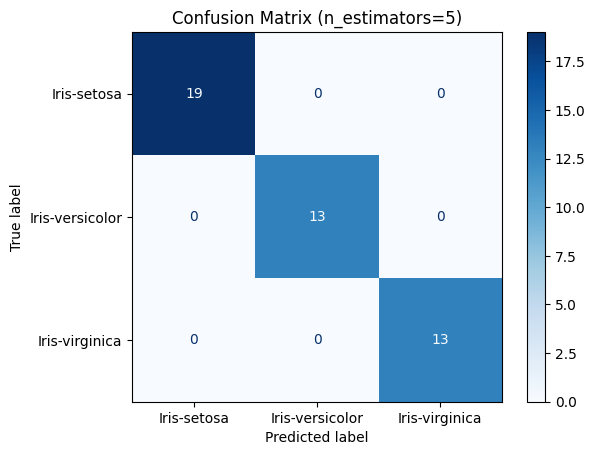


Best Accuracy: 1.0000 using 5 trees


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/iris (4).csv")  # Replace with your file name if different
X = df.drop("species", axis=1)
y = df["species"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fine-tune number of trees
best_score = 0
best_n = 0
best_model = None

for n in range(5, 55, 5):
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"n_estimators={n}, accuracy={score:.4f}")
    if score > best_score:
        best_score = score
        best_n = n
        best_model = model

# Predict using best model
y_pred = best_model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap="Blues")
plt.title(f"Confusion Matrix (n_estimators={best_n})")
plt.show()

print(f"\nBest Accuracy: {best_score:.4f} using {best_n} trees")
